# 提取沪深300股票两两之间的协整关系

In [3]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.tsa.stattools as ts
import statsmodels as sm

In [4]:
def plot_price_series(df, ts1, ts2):
    months = mdates.MonthLocator()  # every month
    fig, ax = plt.subplots()
    ax.plot(df.index, df[ts1], label=ts1)
    ax.plot(df.index, df[ts2], label=ts2)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xlim(datetime.datetime(2012, 1, 1), datetime.datetime(2013, 1, 1))
    ax.grid(True)
    fig.autofmt_xdate()

    plt.xlabel('Month/Year')
    plt.ylabel('Price ($)')
    plt.title('%s and %s Daily Prices' % (ts1, ts2))
    plt.legend()
    plt.show()

def plot_scatter_series(df, ts1, ts2):
    plt.xlabel('%s Price ($)' % ts1)
    plt.ylabel('%s Price ($)' % ts2)
    plt.title('%s and %s Price Scatterplot' % (ts1, ts2))
    plt.scatter(df[ts1], df[ts2])
    plt.show()

def plot_residuals(df):
    months = mdates.MonthLocator()  # every month
    fig, ax = plt.subplots()
    ax.plot(df.index, df["res"], label="Residuals")
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xlim(datetime.datetime(2012, 1, 1), datetime.datetime(2013, 1, 1))
    ax.grid(True)
    fig.autofmt_xdate()

    plt.xlabel('Month/Year')
    plt.ylabel('Price ($)')
    plt.title('Residual Plot')
    plt.legend()

    plt.plot(df["res"])
    plt.show()

In [26]:
start = '1/1/2010'
end = '1/12/2017'
#以建设银行和招商银行为例来计算协整关系
jsyh = web.get_data_yahoo('601939.ss',start,end)
zsyh = web.get_data_yahoo('600036.ss',start,end)

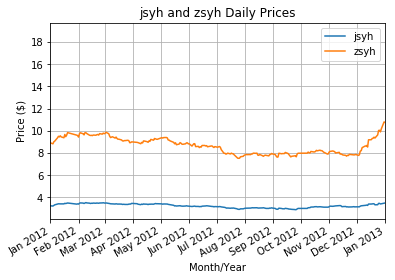

In [27]:
df = pd.DataFrame(index=jsyh.index)
df['jsyh'] = jsyh['Adj Close']
df['zsyh'] = zsyh['Adj Close']
#Plot the two time series
plot_price_series(df,'jsyh','zsyh')

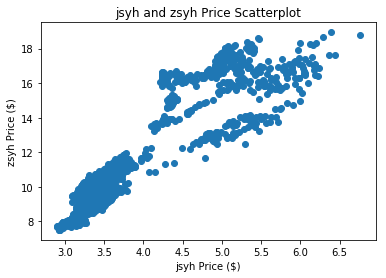

In [28]:
#display a scatter plot of the two time series
plot_scatter_series(df,'jsyh','zsyh')

In [19]:
#Calculate optimal hedge ratio "beta"
#from pandas.stats.api import ols
import statsmodels.api as sm

In [30]:
res =sm.OLS(df['zsyh'],df['jsyh']).fit()

In [37]:
#beta_hr = res.beta.X #这里示例中的res.beta.x实在找不到导致后续都出现问题
#Calculate the residuals of the linear combination
#df["res"] = df["zsyh"] - beta_hr*df["jsyh"]
# Plot the residuals
#plot_residuals(df)

In [38]:
# Calculate and output the CADF test on the residuals
#cadf = ts.adfuller(df['res'])
#pprint.pprint(cadf)

In [ ]:
因为中间示例中的ols无法引入，自己引入的OLS方法计算出的结果无法供后边使用，导致